In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

def poly(d):            # returns the polynomial p
    if d%4==1: # given by 0 1 1 0 -1 -1 0 ... (starting at 0)
        def p(x):
            # define it periodically 
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = 1
            else:
                val = -1

            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<=d:
                return val
            elif x == d+1:
                return val+1
            elif x == -(d+1):
                return val-1
            elif x == d+2:
                return val + (d+2)
            elif x == -(d+2):
                return val - (d+2)
            else:  # can only calculate for x in the "nice" range
                print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return 0
    elif d%4==3: # given by 0 -1 -1 0 1 1 0 ... (starting at 0)
        def p(x):
            # define it periodically 
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = -1
            else:
                val = 1
                
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<=d:
                return val
            elif x == d+1:
                return val+1
            elif x == -(d+1):
                return val-1
            elif x == d+2:
                return val + (d+2)
            elif x == -(d+2):
                return val - (d+2)
            else: # can only calculate for x in the "nice" range
                print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return 0
    else:
        print("Warning, this value of d has not yet been implemented!")
        def p(x):       # returns the identity, so that the program doesn't crash
            return x
        
    return p
            
def Henon(p,X):     # this is the Henon map of polynomial p: (x,y) -> (y, -x + p(y))
    return [X[1],-X[0]+p(X[1])]

def trace_pt(p,X,box_range):        # follows the orbit of a point X under Henon map with polynomial p, 
                                    # stopping either upon repeating a vertex or when we go outside the nice range
    orbit = []
    while X not in orbit:
        orbit.append(X)
        X = Henon(p,X)
        if abs(X[0])>box_range or abs(X[1])>box_range:
            return []               # if we iterate outside the d+2 box, we don't want to plot the orbit at all
    orbit.append(X)                 # add the last vertex to complete the orbit
    return orbit


In [2]:
def plot_orbit (orbit,col_index,box_range):         # plot the orbit
    # initialise the colours
    colours=["navy","mediumblue","slateblue","blueviolet","indigo","mediumorchid","thistle","plum","magenta","deeppink","crimson","lightpink","salmon","red","brown","maroon","saddlebrown","peru","sandybrown","lightsalmon","darkorange","goldenrod","gold","khaki","y","olive","olivedrab","yellowgreen","chartreuse", "limegreen", "g", "seagreen","mediumaquamarine","lightseagreen","teal","c","aqua","deepskyblue","lightskyblue","steelblue"]
    colours = [colours[3*i%len(colours)] for i in range(0,len(colours))] # shuffle so that they're not too close
    col = colours[col_index % len(colours)]         # pick the corresponding colour


    if len(orbit) == 2:     # this must be a fixed point
        plt.plot(orbit[0][0],orbit[0][1],marker=r'$\circlearrowleft$',ms=300/box_range,color = col)
    else:
        xs = [orbit[i][0] for i in range(len(orbit)-1)]
        ys = [orbit[i][1] for i in range(len(orbit)-1)]
        plt.scatter(xs,ys,color = col)              # plots the individual vertices

        for k in range(len(orbit)-1):
            plt.arrow(orbit[k][0],orbit[k][1],orbit[k+1][0]-orbit[k][0],orbit[k+1][1]-orbit[k][1],width=.01,color = col,alpha =0.2)         # plots an arrow between two consecutive iterates

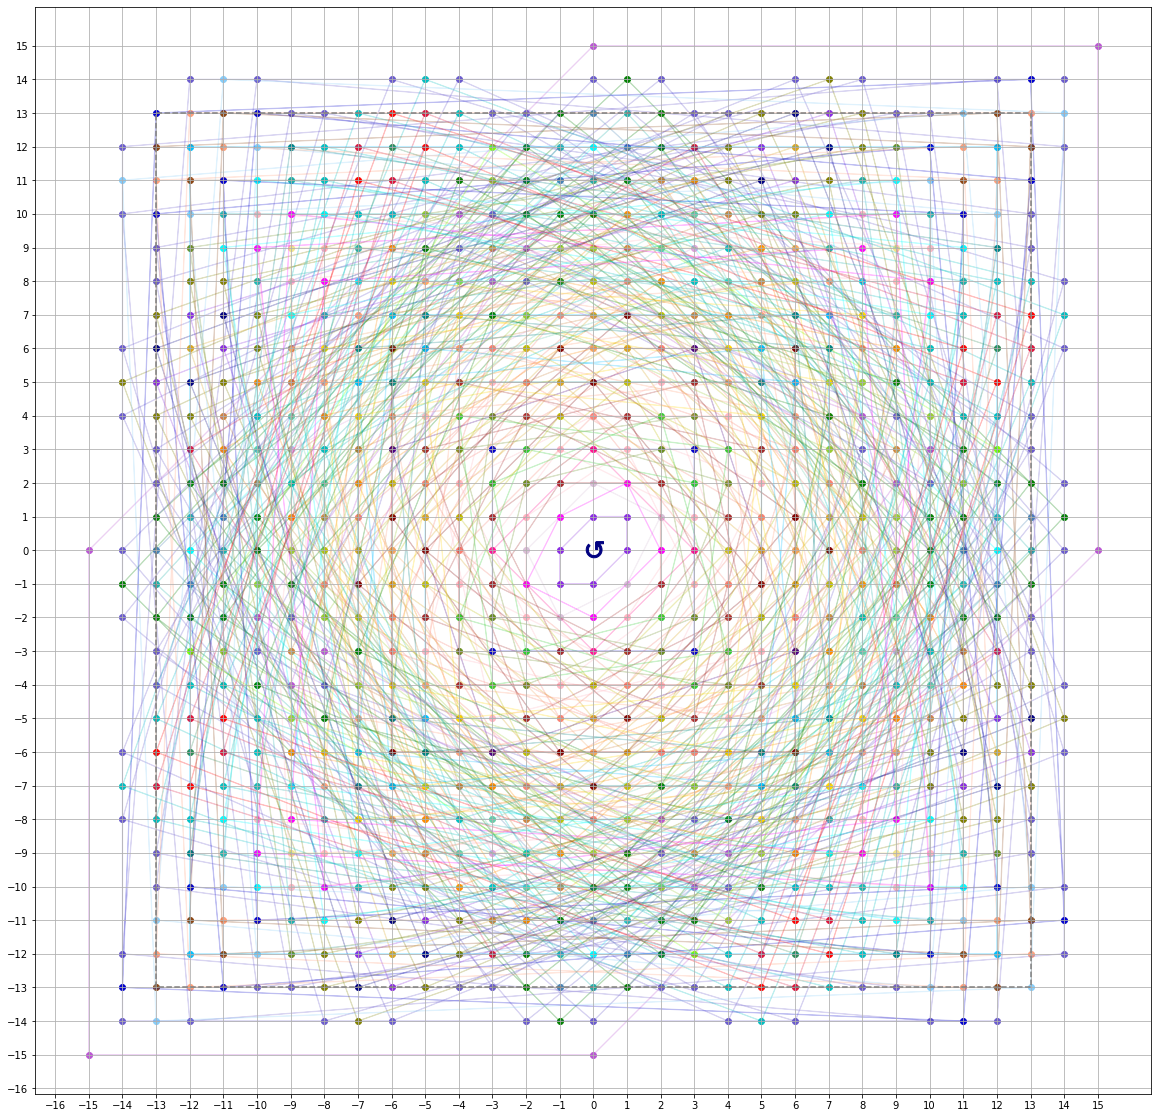

In [4]:
d = 13
p = poly(d)     # get the polynomial
box_range = d+2
check_range = d+2       # could start cycles in a subset of the box 
plotted = []        # store all the vertices whose orbits we've already plotted

col_index = 0
plt.figure(figsize = (20,20))

xs = [-d,-d,d,d,-d]     
ys = [-d,d,d,-d,-d]
plt.plot(xs,ys,"--",color = "grey")     # draw a box through (d,d) etc, to show where the cycles are relative to it

for i in range(0,check_range+1):    
    for j in range(0,check_range+1):        # iterate through all the points
        if [i,j] not in plotted:            # only iterate if we haven't plotted already, to reduce computation
            orbit = trace_pt(p,[i,j],box_range)     # get the orbit by tracing the point
            for pt in orbit:
                plotted.append(pt)          # add each iterate to the list of plotted vertices
            plot_orbit(orbit,col_index,box_range)       # plot the orbit    
            col_index +=1                   # to vary our colours in a nice way

# plot formatting:

plt.grid(which="both")
plt.xticks([i for i in range(-box_range-1,box_range+1)])
plt.yticks([i for i in range(-box_range-1,box_range+1)])
plt.axis('equal')
plt.show()
plt.close()